## ***Trabajo práctico N°2***



1.   Realizar un modelo de regresión simple lineal ó regresión multivariante lineal. Para esto deben escalar los datos, separarlos, entrenar y evaluar.
2.   Realizar un modelo de regresión con SVR o DT. Para esto deben escalar los datos, separarlos, entrenar y evaluar.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statsmodels.api as sm



> # **Modelo de regresion lineal simple**




# 1. Importamos el dataset

In [3]:
!wget https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

--2022-09-07 14:45:37--  https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘insurance.csv’

insurance.csv           [ <=>                ] 600.03K  --.-KB/s    in 0.06s   

2022-09-07 14:45:37 (9.02 MB/s) - ‘insurance.csv’ saved [614433]



In [6]:
data = pd.read_csv('insurance.csv')


In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Eliminamos variables no numéricas

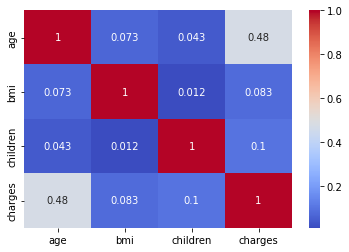

In [7]:
sns.heatmap(data.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True)

# 3. Elegimos las variables

In [ ]:
X = data['age'].to_numpy()
y = data['bmi'].to_numpy()

# 4. Analizamos el dataset 

**Se analiza:** Normalidad de los datos, como se distribuyen y la correlacion.

In [ ]:
# Calculamos la normalidad usando el test de Shapiro-Wilk

from scipy.stats import shapiro
normalidad_X = shapiro(X) #evaluamos normalidad de los datos de X
normalidad_y = shapiro(y) #evaluamos normalidad de los datos de y

print(f"Normalidad de X: {normalidad_X}")
print(f"Normalidad de y: {normalidad_y}")

Normalidad de X: ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
Normalidad de y: ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)


El p-value es < 0.05 por lo cual se rechaza la hipotesis nula (H0) de que se distribuyen de forma normal.

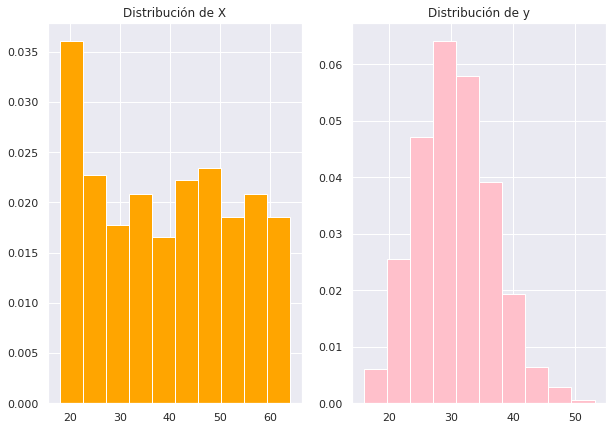

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.hist(X,color='orange',density=True)
plt.title("Distribución de X")
plt.subplot(1,2,2)
plt.hist(y,color='pink',density=True)
plt.title("Distribución de y");

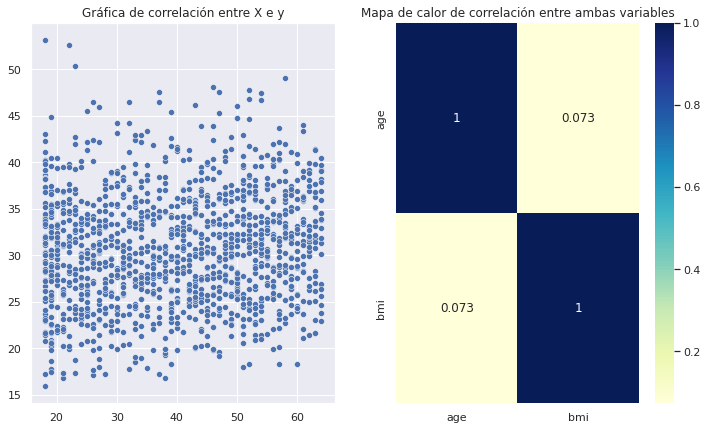

In [ ]:
# Analizamos si se correlacionan a traves de una grafica de scatter plot o un mapa de calor
# Como vimos arriba que no se distribuyen de forma normal, tenemos que hacer un test de correlacion de Kendall
sns.set()

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.scatterplot(x=X, y=y)
plt.title("Gráfica de correlación entre X e y")
plt.subplot(1,2,2)
sns.heatmap(data[["age","bmi"]].corr(method='kendall'), cmap='YlGnBu', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

En el scatterplot podemos ver que no tienen una orientacion lineal. El mapa de calor nos muestra que el valor de correlacion entre las variables es de 0.073, el cual es muy bajo, eso quiere decir que no hay una buena correlacion directamente proporcional.

# 5. Separamos el dataset en entrenamiento y testeo 

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Vemos las especificaciones de cada conjunto de datos formados 
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1003,) | ytrain shape (1003,)
Xtest shape: (335,) | ytest shape (335,)


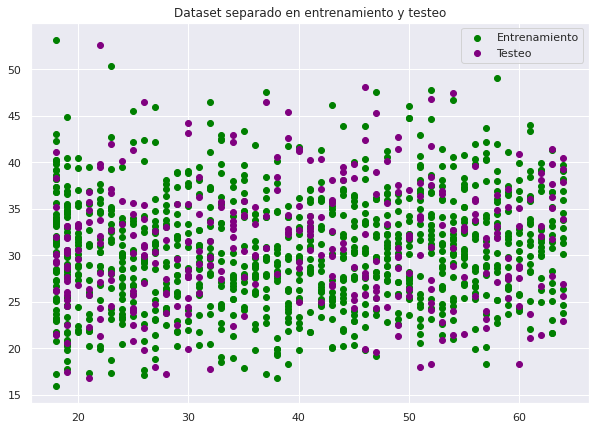

In [ ]:
# Grafico de como queda el dataset separado en entrenamiento y testeo 
plt.figure(figsize=(10,7))
plt.scatter(Xtrain,ytrain,c='green',label='Entrenamiento')
plt.scatter(Xtest,ytest,c='purple',label='Testeo')
plt.legend()
plt.title("Dataset separado en entrenamiento y testeo");

# 6. Entrenamos el modelo de regresión lineal simple 

In [ ]:
#Para entrenar la regresion usamos el parámetro normalize=True, para que normalice [0,1] los datos
# Entrenamos el modelo con la función .fit()
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True) 
linear_model.fit(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
#Vemos el coefficiente e intercepto que "aprendió" el modelo que mejor se ajustan a la relación lineal
print(f"Coeficiente que acompaña a la variable de entrada: {linear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {linear_model.intercept_}")

Coeficiente que acompaña a la variable de entrada: [[0.04768185]]
Intercepto que corta al eje de ordenadas: [28.64001759]


Entonces el modelo final quedaría algo así:

**y = 0.04768185*X0 + 28.6400175**

# 7. Evaluamos el modelo lineal entrenado 

In [ ]:
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {linear_model.score(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1))}")
print(f"Valor de métrica R2 con el conjunto de testeo: {linear_model.score(Xtest.reshape(-1, 1),ytest.reshape(-1, 1))}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.012393305915668451
Valor de métrica R2 con el conjunto de testeo: 0.001557360482753234


In [ ]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_pred = linear_model.predict(Xtest.reshape(-1, 1)).squeeze() 
y_train_pred = linear_model.predict(Xtrain.reshape(-1, 1)).squeeze() 
y_test_pred.shape, y_train_pred.shape

((335,), (1003,))

In [ ]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms 
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 5.043528201929191
Valor de métrica MAE con el conjunto de entrenamiento: 4.795776790873554

Valor de métrica MSE con el conjunto de testeo: 39.932773379922494
Valor de métrica MSE con el conjunto de entrenamiento: 35.67373816117116


In [ ]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Price maximo: {y.max()} | Price minimo: {y.min()} | Price promedio: {y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Price maximo: 53.13 | Price minimo: 15.96 | Price promedio: 30.66339686098655 | Varianza de los datos de entrada X: 197.2538519888909


In [ ]:
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

25.175 vs 30.79 --> diferencia = -5.61 --> error: -19.86%
30.02 vs 30.36 --> diferencia = -0.34 --> error: 0.00%
26.885 vs 31.69 --> diferencia = -4.81 --> error: -14.88%
25.745 vs 30.83 --> diferencia = -5.09 --> error: -19.42%
31.92 vs 29.55 --> diferencia = 2.37 --> error: 6.27%
42.9 vs 30.26 --> diferencia = 12.64 --> error: 27.97%
22.515 vs 29.55 --> diferencia = -7.03 --> error: -31.09%
37.905 vs 31.69 --> diferencia = 6.21 --> error: 15.83%
17.29 vs 29.98 --> diferencia = -12.69 --> error: -69.40%
28.69 vs 30.98 --> diferencia = -2.29 --> error: -6.97%
24.4 vs 30.07 --> diferencia = -5.67 --> error: -20.49%
30.59 vs 30.59 --> diferencia = -0.00 --> error: 0.00%
29.59 vs 30.02 --> diferencia = -0.43 --> error: 0.00%
42.35 vs 30.83 --> diferencia = 11.52 --> error: 25.97%
40.92 vs 31.50 --> diferencia = 9.42 --> error: 21.99%
38.94 vs 30.88 --> diferencia = 8.06 --> error: 20.54%
42.68 vs 30.98 --> diferencia = 11.70 --> error: 25.77%
36.63 vs 30.88 --> diferencia = 5.75 --> error

In [ ]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 15.40%


> # **Modelo de regresion lineal multivariable**

# 1. Cargamos el dataset

In [27]:
# A veces es mejor como buena práctica tener todos los importes antes del código
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as ms
import seaborn as sns
sns.set()

In [9]:
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 2. Eliminamos las variables no numericas

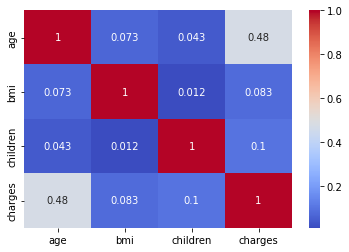

In [13]:
sns.heatmap(data.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True)

# 3. Elegimos las variables

In [11]:
X = data[['age', 'bmi']].to_numpy()
y = data['charges'].to_numpy()

In [12]:
# Observamos el formato, la cantidad de datos que hay en cada variable y 5 ejemplos de cada variable
print(f"X ('area','rooms') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)} | 5 ejemplos se ven así: {X[:5]}\n")
print(f"Y ('price') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)} | 5 ejemplos se ven así: {y[:5]}")

X ('area','rooms') tiene la forma: (1338, 2) | posee cantidad de datos: 1338 | 5 ejemplos se ven así: [[19.    27.9  ]
 [18.    33.77 ]
 [28.    33.   ]
 [33.    22.705]
 [32.    28.88 ]]

Y ('price') tiene la forma: (1338,) | posee cantidad de datos: 1338 | 5 ejemplos se ven así: [16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


# 4. Analizamos el dataset


**Se analiza:** Normalidad de los datos, como se distribuyen y la correlacion.



In [15]:
from scipy.stats import shapiro
# Normalidad la calculamos usando el test de Shapiro-Wilk
normalidad_X_age = shapiro(X[:,0]) #evaluamos normalidad de los datos de X ('age')
normalidad_X_bmi = shapiro(X[:,1]) #evaluamos normalidad de los datos de X ('bmi')
normalidad_y = shapiro(y) #evaluamos normalidad de los datos de y

print(f"Normalidad de X_age: {normalidad_X_age}")
print(f"Normalidad de X_bmi: {normalidad_X_bmi}")
print(f"Normalidad de y: {normalidad_y}")

Normalidad de X_age: ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
Normalidad de X_bmi: ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)
Normalidad de y: ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)


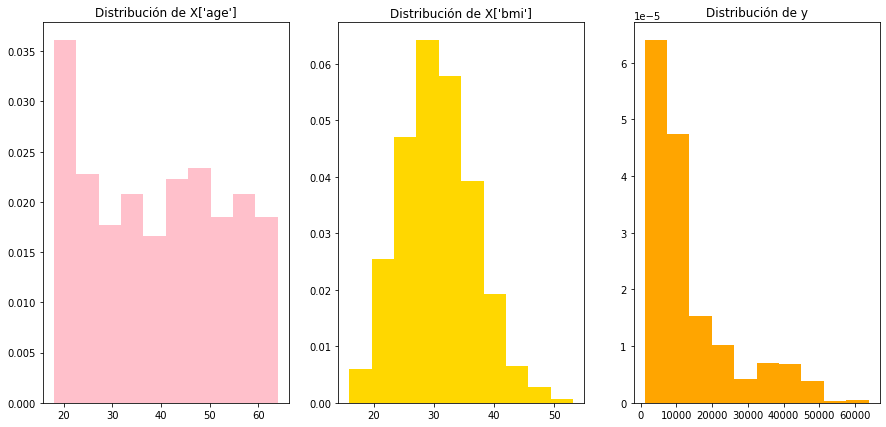

In [16]:
#Vemos como se distribuyen ambos conjuntos de datos X e Y
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(X[:,0],color='pink',density=True)
plt.title("Distribución de X['age']")
plt.subplot(1,3,2)
plt.hist(X[:,1],color='gold',density=True)
plt.title("Distribución de X['bmi']")
plt.subplot(1,3,3)
plt.hist(y,color='orange',density=True)
plt.title("Distribución de y");

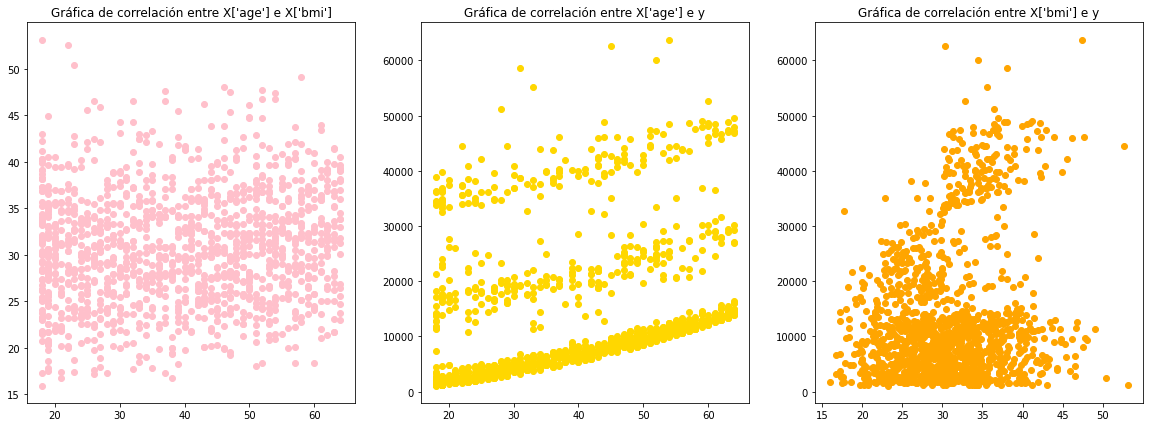

In [17]:
#Vemos si se correlacionan
#Hacemos primero un scatterplot
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],color='pink')
plt.title("Gráfica de correlación entre X['age'] e X['bmi']")
plt.subplot(1,3,2)
plt.scatter(X[:,0],y,color='gold')
plt.title("Gráfica de correlación entre X['age'] e y")
plt.subplot(1,3,3)
plt.scatter(X[:,1],y,color='orange')
plt.title("Gráfica de correlación entre X['bmi'] e y");

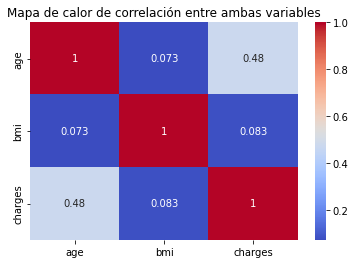

In [20]:
sns.heatmap(data.drop(columns=['children']).corr(method='kendall'), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

# 5. Transformamos los datos

En orden de escalar los datos dentro de un mismo rango de valores, conservanod la distribucion, lo podemos hacer con StandarScaler o MinMaxScales, ambos de Scikit-Learn

In [21]:
# Voy a trabajar con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
X_transformed = scaler.fit_transform(X) #escalamos los datos de entrada X con la función .fit_transform()
print(f"X_transformed: {X_transformed.shape}")

X_transformed: (1338, 2)


In [ ]:
# Vemos 5 ejemplos de datos normales vs datos escalados 
print(f"X original: {X[:5]}\n")
print(f"X transformed: {X_transformed[:5]}")

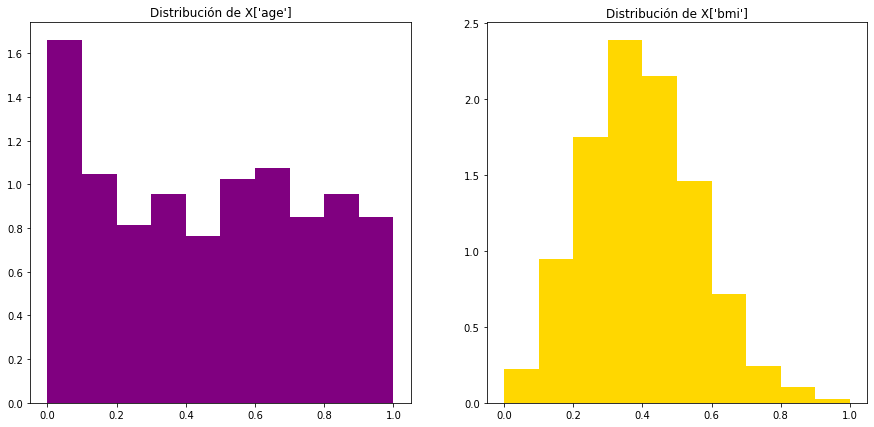

In [25]:
#Vemos como se distribuyen los valores de X_transformed
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(X_transformed[:,0],color='purple',density=True)
plt.title("Distribución de X['age']")
plt.subplot(1,2,2)
plt.hist(X_transformed[:,1],color='gold',density=True)
plt.title("Distribución de X['bmi']");

# 6. Separamos el dataset transformado en entrenamiento y testeo 

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transformed, y, test_size=0.25, random_state=42)
#Vemos las especificaciones de cada conjunto de datos formados 
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1003, 2) | ytrain shape (1003,)
Xtest shape: (335, 2) | ytest shape (335,)


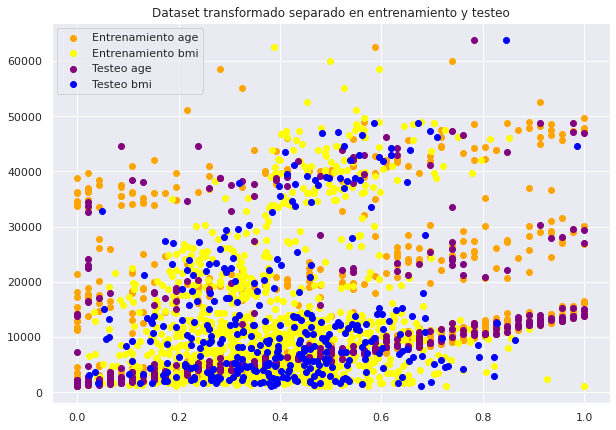

In [29]:
# Vemos gráficamente como queda el dataset transformador separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0],ytrain,c='orange',label='Entrenamiento age')
plt.scatter(Xtrain[:,1],ytrain,c='yellow',label='Entrenamiento bmi')
plt.scatter(Xtest[:,0],ytest,c='purple',label='Testeo age')
plt.scatter(Xtest[:,1],ytest,c='blue',label='Testeo bmi')
plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo");

# 7. Entrenamos el modelo de regresión

In [30]:
# Instanciamos el modelo
multilinear_model = LinearRegression()
multilinear_model.fit(Xtrain,ytrain)

LinearRegression()

In [31]:
#Vemos los coefficientes que "aprendió" o "encontró" el modelo que mejor se ajustan a la relación multiple
print(f"Coeficiente que acompañan a las variables de entrada: {multilinear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {multilinear_model.intercept_}")

Coeficiente que acompañan a las variables de entrada: [10860.58595323 12307.33053626]
Intercepto que corta al eje de ordenadas: 3431.352752725019


El modelo final quedaria: 

**y = 10860.58595323*X0 - 12307.33053626*X1 + 3431.352752725019**



# 8. Evaluamos el modelo lineal

In [33]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {multilinear_model.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {multilinear_model.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.11305926620508677
Valor de métrica R2 con el conjunto de testeo: 0.1288347843390777


In [34]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_m_pred = multilinear_model.predict(Xtest)
y_train_m_pred = multilinear_model.predict(Xtrain) 
y_test_m_pred.shape, y_train_m_pred.shape

((335,), (1003,))

In [35]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms 
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 9188.007558155274
Valor de métrica MAE con el conjunto de entrenamiento: 9000.325577239742

Valor de métrica MSE con el conjunto de testeo: 131451112.26204939
Valor de métrica MSE con el conjunto de entrenamiento: 128686580.36043614


In [36]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Price maximo: {y.max()} | Price minimo: {y.min()} | Price promedio: {y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Price maximo: 63770.42801 | Price minimo: 1121.8739 | Price promedio: 13270.422265141257 | Varianza de los datos de entrada X: 135.45536818225267


In [37]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_m_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 12857.22 --> diferencia = -3762.15 --> error: -41.36%
5272.1758 vs 12336.54 --> diferencia = -7064.37 --> error: -133.99%
29330.98315 vs 17909.31 --> diferencia = 11421.68 --> error: 38.94%
9301.89355 vs 13282.05 --> diferencia = -3980.15 --> error: -42.79%
33750.2918 vs 8951.96 --> diferencia = 24798.34 --> error: 73.47%
4536.259 vs 16129.03 --> diferencia = -11592.77 --> error: -255.54%
2117.33885 vs 5837.87 --> diferencia = -3720.53 --> error: -175.69%
14210.53595 vs 21558.13 --> diferencia = -7347.60 --> error: -51.70%
3732.6251 vs 6232.72 --> diferencia = -2500.10 --> error: -66.98%
10264.4421 vs 14965.46 --> diferencia = -4701.02 --> error: -45.80%
18259.216 vs 9059.11 --> diferencia = 9200.10 --> error: 50.39%
7256.7231 vs 13705.77 --> diferencia = -6449.05 --> error: -88.87%
3947.4131 vs 10541.47 --> diferencia = -6594.06 --> error: -167.05%
46151.1245 vs 18780.12 --> diferencia = 27371.01 --> error: 59.31%
48673.5588 vs 21612.03 --> diferencia = 27061.53 --> erro

In [38]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 120.63%


> # **Modelo de Support vector regressor**

# 1. Cargamos el dataset 

In [39]:
!wget https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv
data = pd.read_csv('insurance.csv')


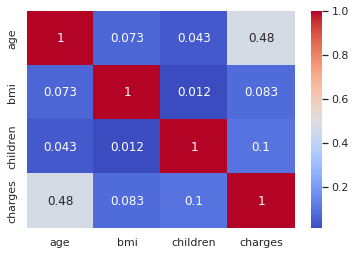

In [43]:
sns.heatmap(data.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True) # Metodo de kendall 

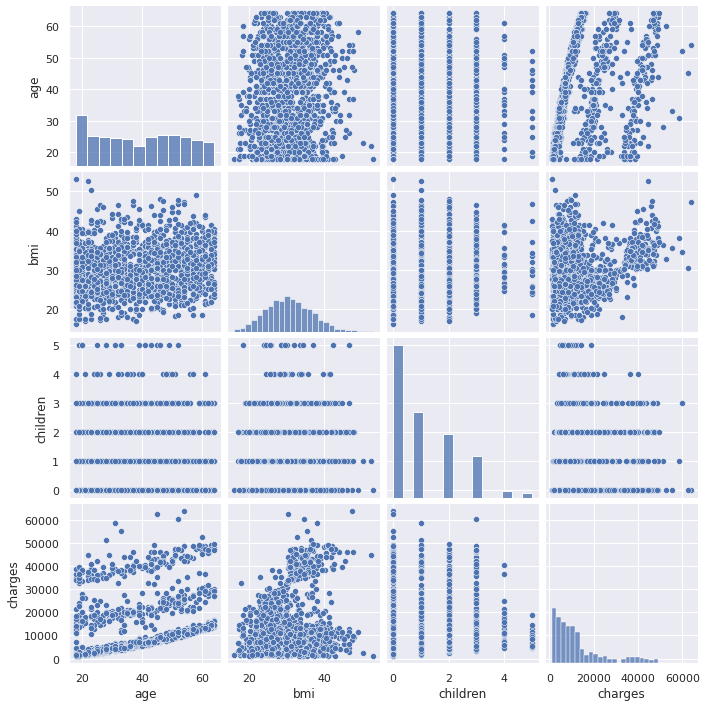

In [ ]:
sns.pairplot(data.drop(columns=['sex', 'smoker', 'region']));

# 2. Evaluamos el dataset 

In [ ]:
from scipy.stats import shapiro
for i in data.drop(columns=['sex', 'smoker', 'region']):
  print(i, '->', shapiro(data[i]))

age -> ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
bmi -> ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)
children -> ShapiroResult(statistic=0.8231803774833679, pvalue=5.066361280494088e-36)
charges -> ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)


In [56]:
X = data[['charges', 'children', 'bmi']].to_numpy()
y = data['age'].to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
from sklearn.svm import SVR #importamos el modelo de support vector regressor (que usa SVM) para hacer regressiones
svr = SVR(C=6.5,epsilon=0.5,degree=1)
svr.fit(Xtrain,ytrain)

SVR(C=6.5, degree=1, epsilon=0.5)

In [58]:
#Vemos los mejores parámetros de SVM
svr.get_params()

{'C': 6.5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.5,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# 3. Evaluamos SVM

In [52]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {svr.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {svr.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.4903809577893522
Valor de métrica R2 con el conjunto de testeo: 0.5032498199643038


In [53]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_svr_pred = svr.predict(Xtest)
y_train_svr_pred = svr.predict(Xtrain) 
y_test_svr_pred.shape, y_train_svr_pred.shape

((335,), (1003,))

In [54]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms 
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_svr_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_svr_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_svr_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_svr_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 5.655089265174242
Valor de métrica MAE con el conjunto de entrenamiento: 5.955793480643334

Valor de métrica MSE con el conjunto de testeo: 98.4984187414841
Valor de métrica MSE con el conjunto de entrenamiento: 100.34396909761773


In [47]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_svr_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 9007.07 --> diferencia = 88.00 --> error: 0.97%
5272.1758 vs 8145.23 --> diferencia = -2873.05 --> error: -54.49%
29330.98315 vs 9983.60 --> diferencia = 19347.38 --> error: 65.96%
9301.89355 vs 9121.21 --> diferencia = 180.68 --> error: 1.94%
33750.2918 vs 8064.25 --> diferencia = 25686.04 --> error: 76.11%
4536.259 vs 8410.31 --> diferencia = -3874.05 --> error: -85.40%
2117.33885 vs 8155.42 --> diferencia = -6038.09 --> error: -285.17%
14210.53595 vs 9934.72 --> diferencia = 4275.82 --> error: 30.08%
3732.6251 vs 8222.36 --> diferencia = -4489.74 --> error: -120.26%
10264.4421 vs 9488.21 --> diferencia = 776.23 --> error: 7.56%
18259.216 vs 7944.47 --> diferencia = 10314.74 --> error: 56.49%
7256.7231 vs 8597.05 --> diferencia = -1340.33 --> error: -18.47%
3947.4131 vs 7856.56 --> diferencia = -3909.15 --> error: -99.03%
46151.1245 vs 9151.52 --> diferencia = 36999.61 --> error: 80.17%
48673.5588 vs 9877.78 --> diferencia = 38795.77 --> error: 79.70%
44202.6536 vs 9271

In [59]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 87.29%
